In [64]:
import os
import matplotlib as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator

In [65]:
song_df = pd.read_csv("Resources/combined_songs.csv")
song_df = song_df.drop(columns=song_df.columns[:2])
song_df

,song_id,song_name,album,artist,duration(ms),release_date,acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
0,3k79jB4aGmMDUQzEwa46Rz,vampire,vampire,Olivia Rodrigo,219724,2023-06-30,0.1690,0.511,0.532,0.000000,5,0.3110,-5.745,1,0.0560,137.827,4,0.322,90,1
1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Paint The Town Red,Doja Cat,231750,2023-08-04,0.2690,0.868,0.538,0.000003,5,0.0901,-8.603,1,0.1740,99.968,4,0.732,100,1
2,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,227195,2023-08-25,0.5540,0.429,0.453,0.000002,0,0.1020,-7.746,1,0.0459,77.639,4,0.155,91,1
3,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Gettin' Old,Luke Combs,265493,2023-03-24,0.1860,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,89,1
4,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Lover,Taylor Swift,178426,2019-08-23,0.1170,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,3ieLey98V9mIIh3W9gBlPF,Barcelona,Wanted on Voyage (Expanded Edition),George Ezra,188960,2014-06-30,0.3200,0.629,0.572,0.000853,5,0.1090,-9.332,1,0.0307,93.997,4,0.182,69,0
1995,023OVLNzXhX0j7CxswUt6D,Cheerleader - Felix Jaehn Remix Radio Edit,Me 4 U,OMI,180560,2015-10-16,0.1410,0.780,0.680,0.000012,4,0.1380,-6.081,1,0.0305,118.026,4,0.594,69,0
1996,0hNduWmlWmEmuwEFcYvRu1,Sunset Lover,Sunset Lover,Petit Biscuit,237792,2015,0.7290,0.783,0.467,0.809000,6,0.1090,-9.474,1,0.0503,90.838,4,0.236,68,0
1997,1BZG99C7Co1r6QUC3zaS59,Same Old Love,Revival (Deluxe),Selena Gomez,229080,2015-10-09,0.0223,0.672,0.593,0.000000,11,0.2140,-4.010,0,0.0304,98.020,4,0.438,68,0


In [66]:
acousticness_count = []

for x in song_df["acousticness"]:
    if x > .2:
        acousticness_count.append("1")
len(acousticness_count)

862

In [67]:
loudness_count = []

for x in song_df["loudness"]:
    if x < 0 and x > -10:
        loudness_count.append("1")
len(loudness_count)

1583

In [68]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_id            1999 non-null   object 
 1   song_name          1999 non-null   object 
 2   album              1999 non-null   object 
 3   artist             1999 non-null   object 
 4   duration(ms)       1999 non-null   int64  
 5   release_date       1999 non-null   object 
 6   acousticness       1999 non-null   float64
 7   danceability       1999 non-null   float64
 8   energy             1999 non-null   float64
 9   insturmentalness   1999 non-null   float64
 10  key                1999 non-null   int64  
 11  liveness           1999 non-null   float64
 12  loudness           1999 non-null   float64
 13  mode               1999 non-null   int64  
 14  spechiness         1999 non-null   float64
 15  tempo              1999 non-null   float64
 16  time_signature     1999 

In [69]:
# Changes duration from ms to mins
song_df['duration(ms)'] = song_df['duration(ms)']/1000
song_df['duration(ms)'] = song_df['duration(ms)']/60
song_df = song_df.rename(columns= {"duration(ms)":"duration(min)"})
song_df

,song_id,song_name,album,artist,duration(min),release_date,acousticness,danceability,energy,insturmentalness,key,liveness,loudness,mode,spechiness,tempo,time_signature,valence,popularity,binary_popularity
0,3k79jB4aGmMDUQzEwa46Rz,vampire,vampire,Olivia Rodrigo,3.662067,2023-06-30,0.1690,0.511,0.532,0.000000,5,0.3110,-5.745,1,0.0560,137.827,4,0.322,90,1
1,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Paint The Town Red,Doja Cat,3.862500,2023-08-04,0.2690,0.868,0.538,0.000003,5,0.0901,-8.603,1,0.1740,99.968,4,0.732,100,1
2,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),Zach Bryan,Zach Bryan,3.786583,2023-08-25,0.5540,0.429,0.453,0.000002,0,0.1020,-7.746,1,0.0459,77.639,4,0.155,91,1
3,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Gettin' Old,Luke Combs,4.424883,2023-03-24,0.1860,0.712,0.603,0.000000,8,0.1150,-5.520,1,0.0262,97.994,4,0.670,89,1
4,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Lover,Taylor Swift,2.973767,2019-08-23,0.1170,0.552,0.702,0.000021,9,0.1050,-5.707,1,0.1570,169.994,4,0.564,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,3ieLey98V9mIIh3W9gBlPF,Barcelona,Wanted on Voyage (Expanded Edition),George Ezra,3.149333,2014-06-30,0.3200,0.629,0.572,0.000853,5,0.1090,-9.332,1,0.0307,93.997,4,0.182,69,0
1995,023OVLNzXhX0j7CxswUt6D,Cheerleader - Felix Jaehn Remix Radio Edit,Me 4 U,OMI,3.009333,2015-10-16,0.1410,0.780,0.680,0.000012,4,0.1380,-6.081,1,0.0305,118.026,4,0.594,69,0
1996,0hNduWmlWmEmuwEFcYvRu1,Sunset Lover,Sunset Lover,Petit Biscuit,3.963200,2015,0.7290,0.783,0.467,0.809000,6,0.1090,-9.474,1,0.0503,90.838,4,0.236,68,0
1997,1BZG99C7Co1r6QUC3zaS59,Same Old Love,Revival (Deluxe),Selena Gomez,3.818000,2015-10-09,0.0223,0.672,0.593,0.000000,11,0.2140,-4.010,0,0.0304,98.020,4,0.438,68,0


In [84]:
print(song_df["loudness"].mean())
print(song_df["insturmentalness"].mean())
print(song_df["acousticness"].mean())
print(song_df["duration(min)"].mode().mean())
print(song_df["tempo"].mean())

-7.754943971985992
0.08168325695847925
0.2806219828564282
3.697578787878788
118.78948324162081


In [70]:
duration_count = []

for x in song_df["duration(min)"]:
    if x > 2 and x < 4:
        duration_count.append("1")
len(duration_count)

1403

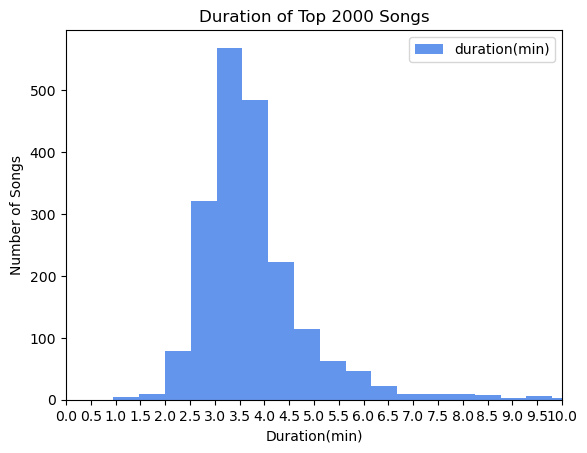

In [71]:
duration_plot = song_df.plot.hist(
    x = "popularity",
    y = "duration(min)",
    bins = 50,
    color = 'cornflowerblue',
    title = "Duration of Top 2000 Songs",
    xlim = [0, 10]

)

duration_plot.set_ylabel("Number of Songs")
duration_plot.set_xlabel("Duration(min)")
duration_plot.xaxis.set_major_locator(MultipleLocator(0.5))

duration_plot

duration_fig = duration_plot.get_figure()

duration_fig.savefig("Resources/duration_plot.png", dpi=300, bbox_inches='tight')

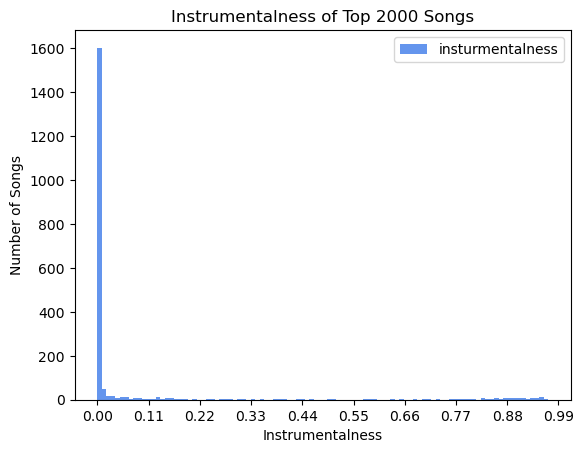

In [72]:
insturment_plot = song_df.plot.hist(
    x = "popularity",
    y = "insturmentalness",
    bins = 100,
    color = 'cornflowerblue',
    title = "Instrumentalness of Top 2000 Songs",
)

insturment_plot.set_ylabel("Number of Songs")
insturment_plot.set_xlabel("Instrumentalness")
insturment_plot.xaxis.set_major_locator(MultipleLocator(0.11))

insturment_plot

insturment_fig = insturment_plot.get_figure()

insturment_fig.savefig("Resources/insturment_plot.png", dpi=300, bbox_inches='tight')

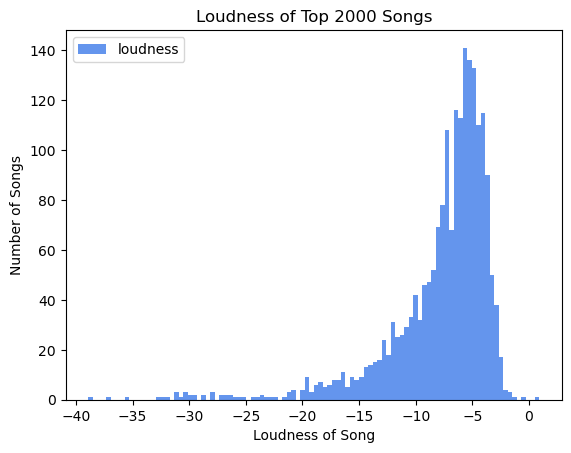

In [73]:
loudness_plot = song_df.plot.hist(
    x = "popularity",
    y = "loudness",
    bins = 100,
    color = 'cornflowerblue',
    title = "Loudness of Top 2000 Songs",
)

loudness_plot.set_ylabel("Number of Songs")
loudness_plot.set_xlabel("Loudness of Song")

loudness_plot

loudness_fig = loudness_plot.get_figure()

loudness_fig.savefig("Resources/loudness_plot.png", dpi=300, bbox_inches='tight')

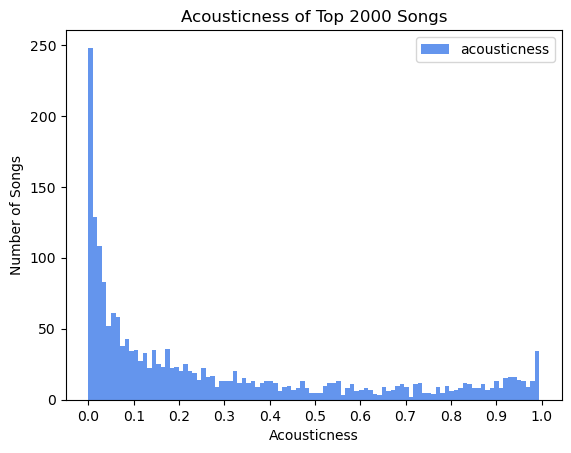

In [74]:
acousticness_plot = song_df.plot.hist(
    x = "popularity",
    y = "acousticness",
    bins = 100,
    color = 'cornflowerblue',
    title = "Acousticness of Top 2000 Songs",
)

acousticness_plot.set_ylabel("Number of Songs")
acousticness_plot.set_xlabel("Acousticness")
acousticness_plot.xaxis.set_major_locator(MultipleLocator(0.1))

acousticness_plot

acousticness_fig = acousticness_plot.get_figure()

acousticness_fig.savefig("Resources/acousticness_plot.png", dpi=300, bbox_inches='tight')

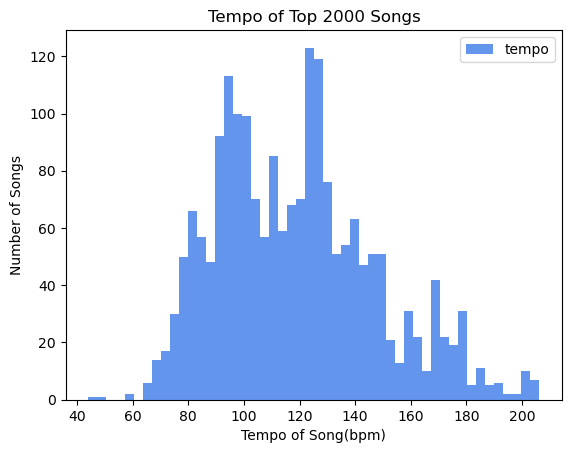

In [75]:
tempo_plot = song_df.plot.hist(
    x = "popularity",
    y = "tempo",
    bins = 50,
    color = 'cornflowerblue',
    title = "Tempo of Top 2000 Songs",
    #xlim = [0, 10]

)

tempo_plot.set_ylabel("Number of Songs")
tempo_plot.set_xlabel("Tempo of Song(bpm)")
#tempo_plot.xaxis.set_major_locator(MultipleLocator(0.5))

tempo_plot

tempo_fig = tempo_plot.get_figure()

tempo_fig.savefig("Resources/tempo_plot.png", dpi=300, bbox_inches='tight')